In [1]:
from os.path import exists

import anndata
import numpy as np
import scanpy as sc
import scvi
from IPython.core.debugger import set_trace
from scvi.data import synthetic_iid
from popv.preprocessing import Process_Query

import popv


def get_test_anndata():
    save_folder = "popv_test_results/"
    fn = save_folder + "annotated_query.h5ad"
    if exists(save_folder + fn):
        return anndata.read(save_folder + fn)

    ref_adata_path = (
        "dataset/test/ts_lung_subset.h5ad"
    )
    ref_adata = sc.read(ref_adata_path)

    query_adata_path = (
        "dataset/test/lca_subset.h5ad"
    )
    query_adata = sc.read(query_adata_path)

    ref_labels_key = "cell_ontology_class"
    ref_batch_key = ["donor", "method"]
    min_celltype_size = np.min(ref_adata.obs.groupby(ref_labels_key).size())
    n_samples_per_label = np.max((min_celltype_size, 50))

    query_batch_key = None

    # Lesser used parameters
    query_labels_key = None
    unknown_celltype_label = "unknown"
    adata = Process_Query(
        query_adata,
        ref_adata,
        save_folder=save_folder,
        query_batch_key=query_batch_key,
        query_labels_key=query_labels_key,
        unknown_celltype_label=unknown_celltype_label,
        ref_labels_key=ref_labels_key,
        ref_batch_key=ref_batch_key,
        pretrained_scanvi_path=None,
        pretrained_scvi_path=None,
        n_samples_per_label=n_samples_per_label,
        hvg=None
    )

    return adata

/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN3c106detail19maybe_wrap_dim_slowExxb)
  Referenced from: '/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python3.8/site-packages/torchvision/image.so'
  Expected in: '/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python3.8/site-packages/torch/lib/libc10.dylib'
  warn(f"Failed to load image Python extension: {e}")
Global seed set to 0
/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python3.8/site-packages/chex/_src/pytypes.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.
  PyTreeDef = type(jax.tree_structure(None))
/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python

In [2]:
onclass_ontology_file = "ontology/cl.ontology"
onclass_obo_fp = "ontology/cl.obo"
onclass_emb_fp = "ontology/cl.ontology.nlp.emb"
adata = get_test_anndata().adata

/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [3]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('Filtered_cells', Index([], dtype='object')), ('log1p', {'base': None}), ('pca', {'params': {'zero_center': True, 'use_highly_variable': False}, 'variance': array([390.22153 , 327.89697 , 236.942   , 171.09705 , 117.97844 ,
       101.45503 ,  89.10274 ,  70.41709 ,  66.96779 ,  55.005013,
        45.58282 ,  43.47569 ,  39.05398 ,  36.184917,  34.163708,
        33.7267  ,  31.839516,  30.413847,  27.806114,  26.706438,
        25.887337,  25.32974 ,  23.916939,  23.158321,  22.622833,
        22.241983,  20.9328  ,  20.694727,  20.513165,  19.426348,
        19.290133,  18.833437,  18.314955,  18.182608,  17.926287,
        17.681908,  17.45516 ,  17.256773,  17.069843,  16.938087,
        16.830706,  16.707888,  16.636751,  16.514635,  16.39914 ,
        16.362509,  16.163643,  16.121136,  16.005688,  15.81518 ],
      dtype=float32), 'variance_ratio': array([0.02793352, 0.02347209, 0.0169612 , 0.01224777, 0.00844534,
       0.00726253, 0.006

In [4]:
from popv import algorithms

getattr(algorithms, "knn_on_bbknn_pred")

popv.algorithms._bbknn.BBKNN

In [5]:
methods = ["knn_on_bbknn_pred"]

from popv.annotation import annotate_data

annotate_data(adata, save_path='new', methods=methods)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/homebrew/Caskroom/miniforge/base/envs/scvi-env/lib/python3.8/site-packages/sklearn/neighbors/_base.py:175: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  warnings.warn('Precomputed sparse input was not sorted by data.',


['popv_knn_on_bbknn_prediction']


In [6]:
%matplotlib inline  

In [7]:
adata

AnnData object with n_obs × n_vars = 2000 × 23681
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'cell_ontology_type', 'cell_ontology_id', '_dataset', 'n_counts', 'popv_knn_on_bbknn_prediction', 'popv_majority_vote_prediction', 'popv_majority_vote_score', 'popv_prediction', 'popv_prediction_score'
    var: 'mean', 'std'
    uns: 'Filtered_cells', 'log1p', 'pca', 'unknown_celltype_label', '_pretrained_scvi_path', '_pretrained_scanvi_path', '_cl_obo_file', '_cl_ontology_file', '_nlp_emb_file', '_use_gpu', 'neighbors'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap', 'X_umap_bbknn_popv'
    varm: 'PCs'
    

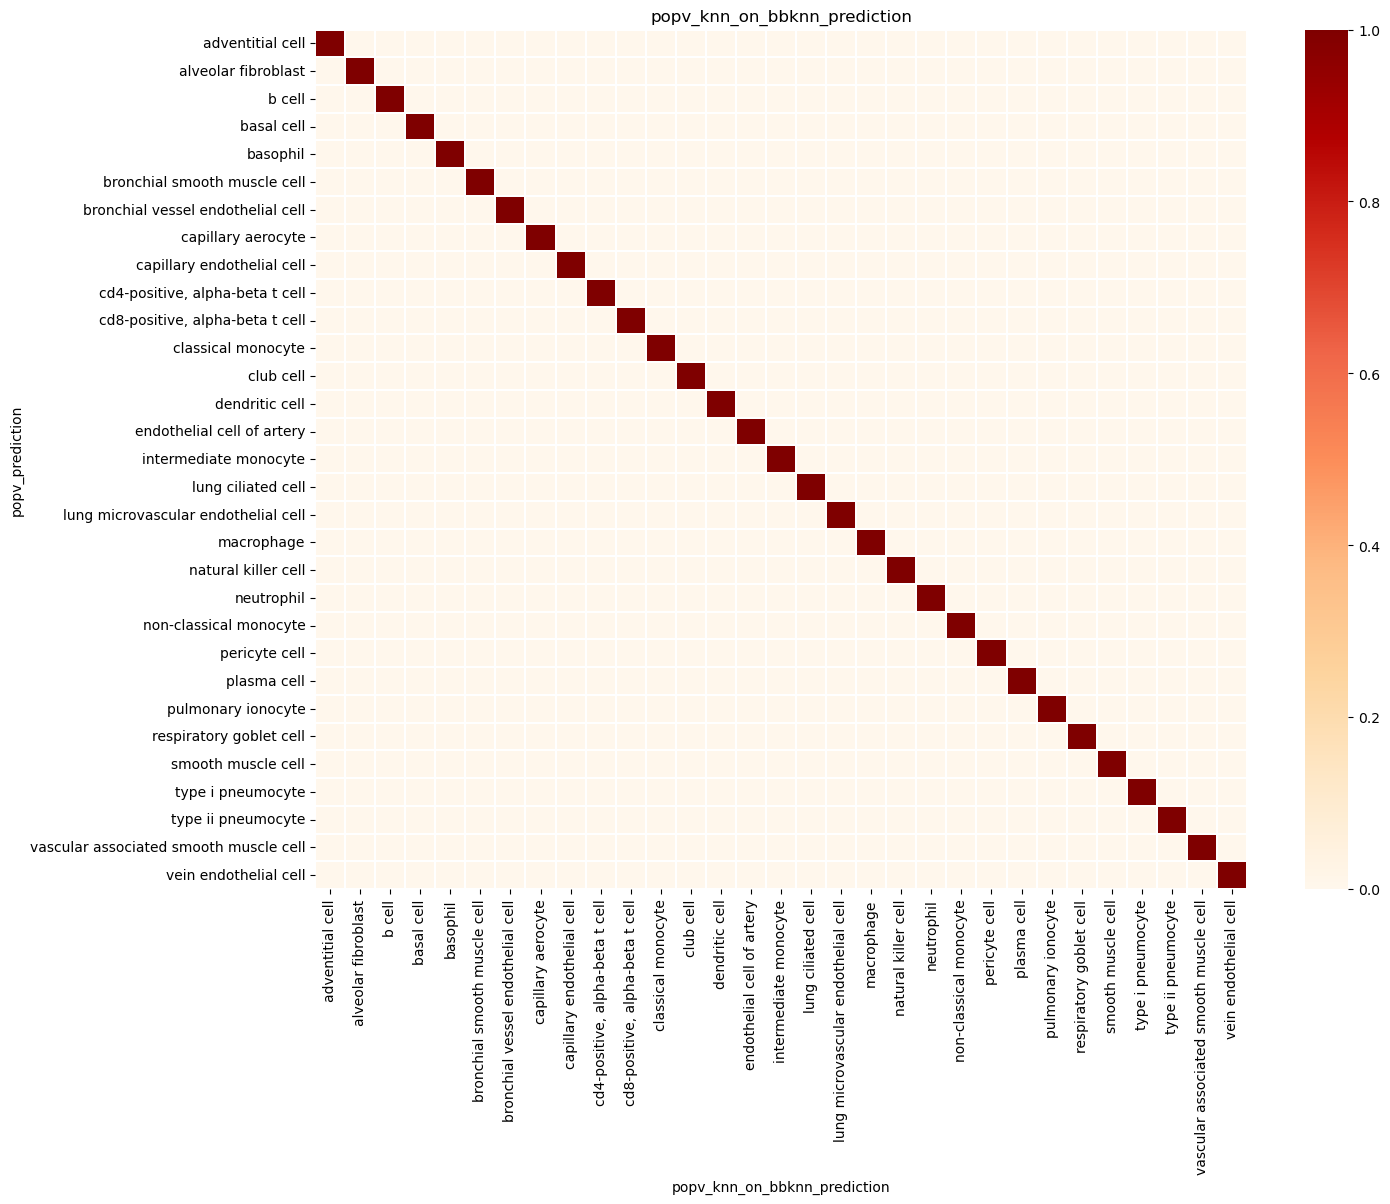

In [8]:
from popv.visualization import make_agreement_plots

all_prediction_keys = [
        "popv_knn_on_bbknn_prediction",
        "popv_knn_on_scvi_prediction",
        "popv_scanvi_prediction",
        "popv_svm_prediction",
        "popv_rf_prediction",
        "popv_onclass_prediction",
        "popv_scanorama_prediction",
    ]

pred_keys = [key for key in adata.obs.keys() if key in all_prediction_keys]
make_agreement_plots(adata, methods=pred_keys, popv_prediction_key='popv_prediction', save_folder=None)

NameError: name 'save_folder' is not defined

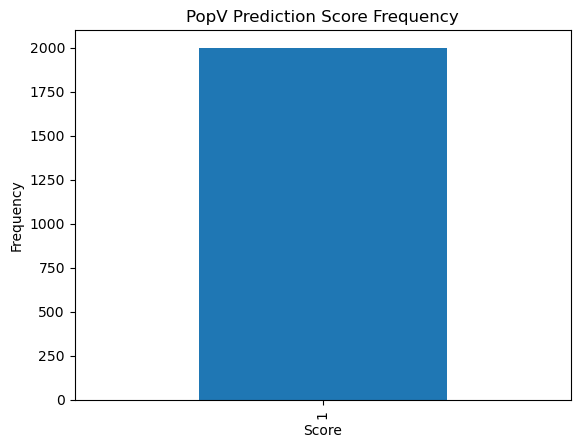

In [8]:
assert "popv_scanvi_prediction" in adata.obs.columns
assert not adata.obs["popv_scanvi_prediction"].isnull().any()